In [1]:
import pandas as pd 
import numpy as np 
import os

### Taks 1: Merging 12 months data into one single file

In [6]:
df = pd.read_csv('SalesAnalysis/Sales_Data/Sales_April_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [13]:
files = [file for file in os.listdir('SalesAnalysis/Sales_Data')]
files.sort()
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [ ]:
# combined_dict = dict()
# for i in range(len(files)):
#     combined_dict[i] = pd.read_csv(f'SalesAnalysis/Sales_Data/{files[i]}')

In [57]:
all_df = pd.DataFrame()
for file in files:
    df = pd.read_csv(f'SalesAnalysis/Sales_Data/{file}')
    all_df = pd.concat([df, all_df])

all_df.to_csv('all_months_sales.csv', index=False)

### Read in the combined data

In [2]:
df = pd.read_csv('all_months_sales.csv')
df = df.dropna(how='any')
df.reset_index(drop=True, inplace=True)

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


## What was the best month for sales? How much has earned in that month?

## Adding month column

In [3]:
df = df[df['Order Date'].str[0:2] != 'Or']
df[df.isnull().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [4]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95


<AxesSubplot:xlabel='Month'>

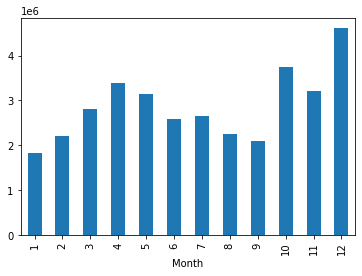

In [5]:
df.groupby('Month').sum()['Sales'].plot(kind='bar')


## Which US city has the highest number of sales

### Add a city column

In [6]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95
...,...,...,...,...,...,...,...,...
186300,194090,Google Phone,1,600.00,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",4,600.00
186301,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",4,3.84
186302,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",4,5.98
186303,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",4,3.84


In [7]:
# Use .apply() to apply a function to a Series
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))
# df.drop(columns='State', inplace=True)

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles CA
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90,Austin TX
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles CA
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle WA
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta GA


In [8]:
q2_result = df.groupby('City').sum().sort_values('Sales', ascending=False)
q2_result

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Seattle WA,16553,2.733296e+06,104941,2.747755e+06
Portland OR,11303,1.860558e+06,70621,1.870732e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06


## What time should we display advertisements to maximise the sales

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
# df.drop(columns='Order DateTime', inplace=True)

In [11]:
df['Hour'] = df['Order Date'].apply(lambda x: x.hour)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles CA,14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin TX,10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles CA,17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle WA,7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta GA,19


In [12]:
q3_result = df.groupby('Hour').sum()
q3_result.sort_values('Sales', ascending=False)

,Quantity Ordered,Price Each,Month,Sales
Hour,,,,
19,14470,2398588.31,91389,2412938.54
12,14202,2299876.68,89161,2316821.34
11,14005,2288855.18,87654,2300610.24
20,13768,2268185.16,86375,2281716.24
18,13802,2207696.93,86421,2219348.30
13,13685,2139743.86,85808,2155389.80
17,12229,2116777.02,77454,2129361.61
14,12362,2072194.77,77836,2083672.73
21,12244,2030763.83,77103,2042000.86


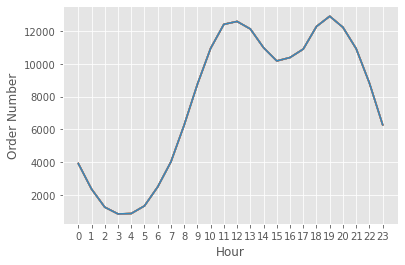

In [13]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

hours = [hour for hour, df in df.groupby('Hour')]

plt.plot(hours, df.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Order Number')
plt.show()

## What products are most often sold together

In [14]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles CA,14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin TX,10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles CA,17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle WA,7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta GA,19


In [23]:
test_df = df[df['Order ID'].duplicated(keep=False)]
# test_df = test_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
test_df['Grouped'] = test_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
test_df = test_df[['Order ID', 'Grouped']].drop_duplicates()

test_df.head()

,Order ID,Grouped
20,248171,"USB-C Charging Cable,USB-C Charging Cable"
60,248210,"iPhone,Lightning Charging Cable"
70,248219,"Bose SoundSport Headphones,Google Phone"
117,248265,"Vareebadd Phone,Bose SoundSport Headphones"
176,248323,"Google Phone,Bose SoundSport Headphones"


In [24]:
from itertools import combinations
from collections import Counter

In [28]:
c = Counter()

for i in test_df['Grouped']:
    i_list = i.split(',')
    c.update(Counter(combinations(i_list, 3)))

for key, value in c.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5


### What products sold the most?

In [52]:
df_product = df.groupby('Product')
quantity_ordered = df_product.sum()['Quantity Ordered']

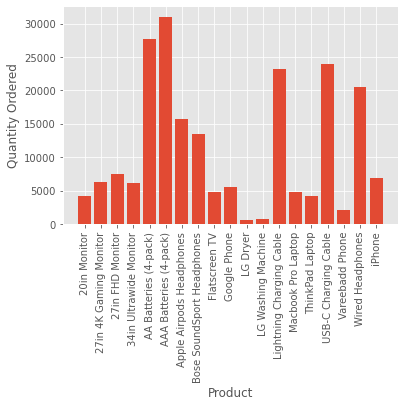

In [53]:
products = [product for product, df in df_product]

plt.bar(products, quantity_ordered)
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

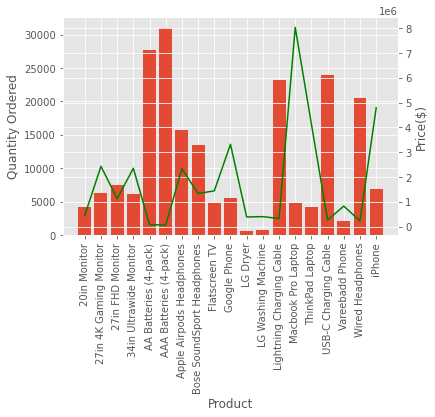

In [61]:
prices = df_product.sum()['Price Each']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax2.plot(products, prices, color='g')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price($)')
ax1.set_xticklabels(products, rotation=90)

plt.show()